11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8578 - loss: 0.4808 - val_accuracy: 0.9606 - val_loss: 0.1289
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9722 - loss: 0.0944 - val_accuracy: 0.9720 - val_loss: 0.0903
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9834 - loss: 0.0543 - val_accuracy: 0.9705 - val_loss: 0.0970
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9753 - val_loss: 0.0877
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9897 - loss: 0.0321 - val_accuracy: 0.9762 - val_loss: 0.0907
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9922 - loss: 0.0223 - val_accuracy: 0.9772 - val_loss: 0.0948
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9762 - val_loss: 0.0975
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9956 - loss: 0.0134 - val_ac

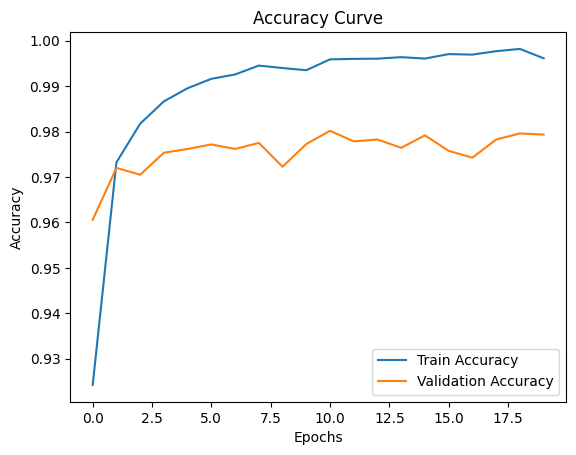

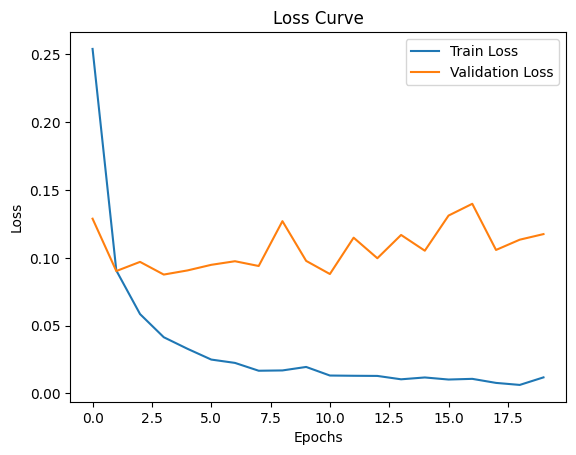

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Plot the loss and accuracy curves
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Key difficulties involved in using ANN for handwritten character recognition:

**Loss of Spatial Information:**
ANNs flatten image data into a vector, losing spatial relationships between pixels, which makes it harder to recognize patterns and structures in handwritten characters.

**Lower Accuracy:**
ANNs often achieve lower accuracy compared to CNNs on image tasks because they do not leverage spatial hierarchies and local feature extraction, leading to poorer recognition performance.

**Higher Computational Cost:**
To achieve comparable performance, ANNs may require more neurons and layers, increasing computational resources and training time, and potentially leading to slower convergence.

**Overfitting:**
ANNs are more prone to overfitting, particularly with complex image data, as they can memorize training data rather than generalizing from it, resulting in higher test loss.

**Manual Feature Engineering:**
ANNs typically require extensive manual preprocessing and feature extraction, which can be complex and less effective compared to the automatic feature learning capabilities of CNNs.

In [ ]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
input_layer = tf.keras.Input(shape=(28, 28, 1))

# First Convolutional Layer with Padding and Stride 1
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(input_layer)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

# Second Convolutional Layer with Padding and Stride 1
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.AveragePooling2D((2, 2), strides=2)(x)

# Third Convolutional Layer with Stride 1
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)
x = layers.MaxPooling2D((2, 2), strides=2)(x)

# Flatten the output from the convolutional layers
x = layers.Flatten()(x)

# Fully connected layer
x = layers.Dense(128, activation='relu')(x)

# Output layer
output_layer = layers.Dense(10, activation='softmax')(x)

# Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 269ms/step - accuracy: 0.8166 - loss: 0.5985 - val_accuracy: 0.9710 - val_loss: 0.0930
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 216ms/step - accuracy: 0.9774 - loss: 0.0713 - val_accuracy: 0.9835 - val_loss: 0.0586
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 222ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9855 - val_loss: 0.0508
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 138s 212ms/step - accuracy: 0.9891 - loss: 0.0356 - val_accuracy: 0.9877 - val_loss: 0.0432
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 88s 228ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9848 - val_loss: 0.0499
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 212ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9893 - val_loss: 0.0420
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 216ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 225ms/step - accuracy: 0.9961 - loss:

5) Performance Comparison:

a. **Accuracy:**
CNN: 99.03%
ANN: 97.96%

Comparison:
The CNN achieves a higher accuracy (99.03%) compared to the ANN (97.96%). This indicates that the CNN is more effective at correctly classifying handwritten digits. The CNN's ability to recognize complex patterns and spatial relationships in the images contributes to this higher accuracy.

b. **Loss:**
CNN: 0.0329
ANN: 0.1041

Comparison:
The CNN has a significantly lower test loss (0.0329) compared to the ANN (0.1041). This means that the CNN's predictions are closer to the true values and it has a better fit to the data. A lower loss indicates that the CNN has learned to classify the digits with fewer errors.

Summary of how CNNs play a vital role in image recognition:

**Automatic Feature Extraction:**
CNNs learn and extract important features (edges, textures, patterns) automatically, eliminating the need for manual feature engineering.

**Spatial Hierarchies:**
They capture hierarchical patterns by learning simple features in early layers and complex patterns in deeper layers, preserving spatial relationships.

**Parameter Efficiency:**
Use weight sharing and pooling layers to reduce the number of parameters, making the model more computationally efficient and less prone to overfitting.

**Translation Invariance**:
CNNs are capable of recognizing objects regardless of their position in the image, thanks to pooling and convolutional layers.

**Adaptability to Complex Tasks:**
CNNs excel not just in classification but also in advanced tasks like object detection and segmentation, and they benefit from transfer learning for diverse applications.